# A first multiplet calculation using the Jupyter Notebook

In this notebook you will calculate the isotropic absorption and circular dichroic spectra of a Ni2+ ion in an octahedral coordination environment. The purpose of this exercise is to familiarize yourself with the programming interface (API).

In [1]:
from crispy.notebook import Calculation, Config

## Update the settings

In [2]:
config = Config()
config.set_setting("Shift Spectra", True)
config.set_setting("Remove Files", False)

## Create the calculation instance

To create a new calculation object you need to specify the element, charge, experiment, and edge. You can print information about the calculations by simply executing it in a cell.

In [3]:
calc = Calculation("Ni2+", "Oh", "XAS", "L2,3 (2p)")
calc

Basename: Ni2+_Oh_XAS_2p
Temperature: 10
Magnetic Field: 0

## Select the spectra that we want to calculate

In [4]:
calc.spectra

Isotropic Absorption: True
Absorption: False
Circular Dichroic: False
Linear Dichroic: False

In [5]:
calc.spectra.enable("Circular Dichroic")

In [6]:
calc.spectra

Isotropic Absorption: True
Absorption: False
Circular Dichroic: True
Linear Dichroic: False

## Change the calculation parameters

It can be the general parameters of the calculation (temperature, magnetic field, etc.), the axis parameters (broadening, number of points), or the Hamiltonian parameters (scale factors for Slater integrals, the number of states from the initial Hamiltonian that will contribute to the final spectra).

In [7]:
calc.set_parameter("Magnetic Field", 6.5)
calc

Basename: Ni2+_Oh_XAS_2p
Temperature: 10
Magnetic Field: 6.5

In [8]:
calc.xaxis.set_parameter("Gaussian", 0.24)
calc.xaxis.set_parameter("Lorentzian", 1.0)
calc.xaxis

X-axis:
  Start: 843.0
  Stop: 883.0
  Number of Points: 2000
  Gaussian: 0.24
  Lorentzian: 1.0

In [9]:
parameters = [("Fk", 0.7), ("Gk", 0.7), ("10Dq(3d)", 2.8), ("Number of States", 3)]
for name, value in parameters:
    calc.hamiltonian.set_parameter(name, value)
calc.hamiltonian

General:
  Fk: 0.7
  Gk: 0.7
  Zeta: 1.0
  Number of States: 3
  Number of Configurations: 1
Terms:
  Atomic:
    Initial Hamiltonian:
      U(3d,3d): [0.0]
      F2(3d,3d): [12.2338, 0.7]
      F4(3d,3d): [7.5975, 0.7]
      ζ(3d): [0.0826, 1.0]
    Final Hamiltonian:
      U(3d,3d): [0.0]
      F2(3d,3d): [13.0058, 0.7]
      F4(3d,3d): [8.0839, 0.7]
      U(2p,3d): [0.0]
      F2(2p,3d): [7.7213, 0.7]
      G1(2p,3d): [5.7865, 0.7]
      G3(2p,3d): [3.2909, 0.7]
      ζ(3d): [0.1022, 1.0]
      ζ(2p): [11.507, 1.0]
  Crystal Field:
    Initial Hamiltonian:
      10Dq(3d): [2.8]
    Final Hamiltonian:
      10Dq(3d): [2.8]
  3d-Ligands Hybridization (LMCT):
    Initial Hamiltonian:
      Δ(3d,L1): [0.0]
      Veg(3d,L1): [0.0]
      Vt2g(3d,L1): [0.0]
      10Dq(L1): [0.0]
    Final Hamiltonian:
      Δ(3d,L1): [0.0]
      Veg(3d,L1): [0.0]
      Vt2g(3d,L1): [0.0]
      10Dq(L1): [0.0]
  3d-Ligands Hybridization (MLCT):
    Initial Hamiltonian:
      Δ(3d,L2): [0.0]
      Veg(3d,L2)

## Print the input file

Now that all is set up, you can have a look at the calculation input file.

In [10]:
print(calc.get_input())

--------------------------------------------------------------------------------
-- Quanty input file generated using Crispy. If you use this file please cite
-- the following reference: http://dx.doi.org/10.5281/zenodo.1008184.
--
-- elements: 3d
-- symmetry: Oh
-- experiment: XAS
-- edge: L2,3 (2p)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
-- Set the verbosity of the calculation. For increased verbosity use the values
-- 0x00FF or 0xFFFF.
--------------------------------------------------------------------------------
Verbosity(0x0000)

--------------------------------------------------------------------------------
-- Define the parameters of the calculation.
--------------------------------------------------------------------------------
Temperature = 10 -- Temperature (Kelvin).

NPsis = 3 -- Number of states to consider in the spectra calculation.
NPsisAuto = tr

## Run the calculation and print the output after the calculation finishes

In [11]:
calc.run()

print(calc.get_output())

====    written by Maurits W. Haverkort                  ====
====    with contributions from:                         ====
====    Yi Lu, Robert Green, Sebastian Macke             ====
====    Marius Retegan, Martin Brass, and Simon Heinze   ====
====    (C) 1995-2018   All rights reserved              ====
====    www.quanty.org                                   ====
====    Beta version, be critical and report errors!!!   ====
====    Version 0.6 Autumn 2018                          ====
====            compiled at: Nov 25 2018 at 23:37:47     ====
====    When used in scientific publications please cite ====
====    one of the following papers as appropriate with  ====
====    respect to the methods used in your publication: ====
====    Phys. Rev. B 85, 165113 (2012)                   ====
====    Phys. Rev. B 90, 085102 (2014)                   ====
====    Euro Phys. Lett. 108, 57004 (2014)               ====
====    J. of Phys.: Conf. Series 712, 012001 (2016)     ====
Program 

## Plot the calculated spectra

<IPython.core.display.Javascript object>


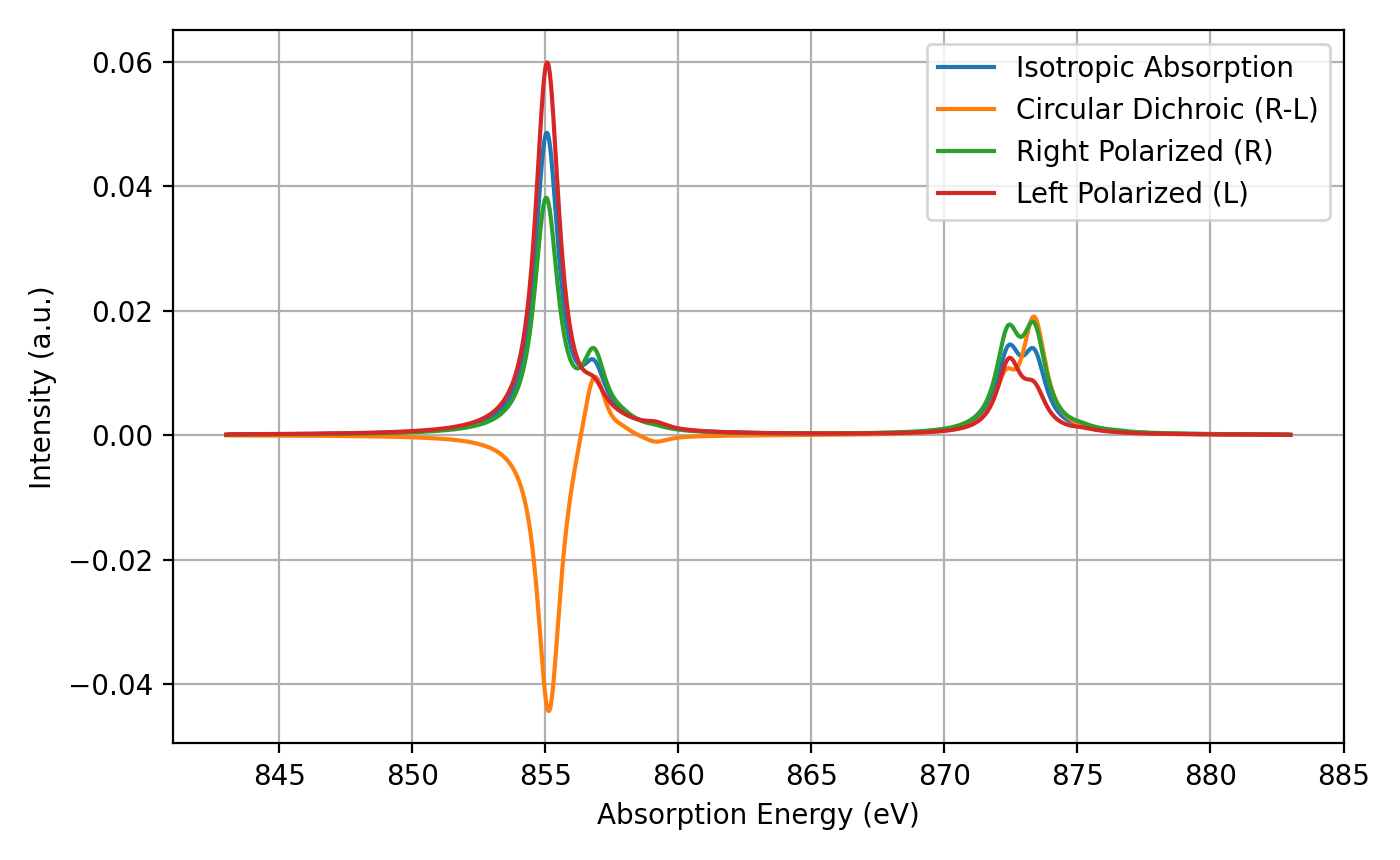

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4.3))

calc.spectra.plot(ax=ax)

ax.legend()
ax.grid()
ax.set_xlabel("Absorption Energy (eV)")
ax.set_ylabel("Intensity (a.u.)")
plt.tight_layout()